In [173]:
import os
from collections import namedtuple
from time import time

import numpy as np
import pandas as pd
import seaborn as sns
from ortools.sat.python import cp_model
from matplotlib import pyplot as plt
from tqdm import tqdm

from src import dataset, config

%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [176]:
plt.style.use('seaborn')
np.random.seed(config.RANDOM_SEED)

In [162]:
product_dataset = dataset.ProductDataset(
    "data/products.pkl",
    int(1e+6),
    config.min_lenght, config.pallet_lenght, 
    config.min_width, config.pallet_width, 
    config.min_height, config.max_product_height, 
    config.min_weight, config.pallet_load,
    force_overload=True
)
product_dataset.products.head()

,lenght,width,height,weight
0,178,316,167,2
1,291,605,342,51
2,149,277,410,47
3,221,302,134,59
4,168,318,138,2


<IPython.core.display.Javascript object>


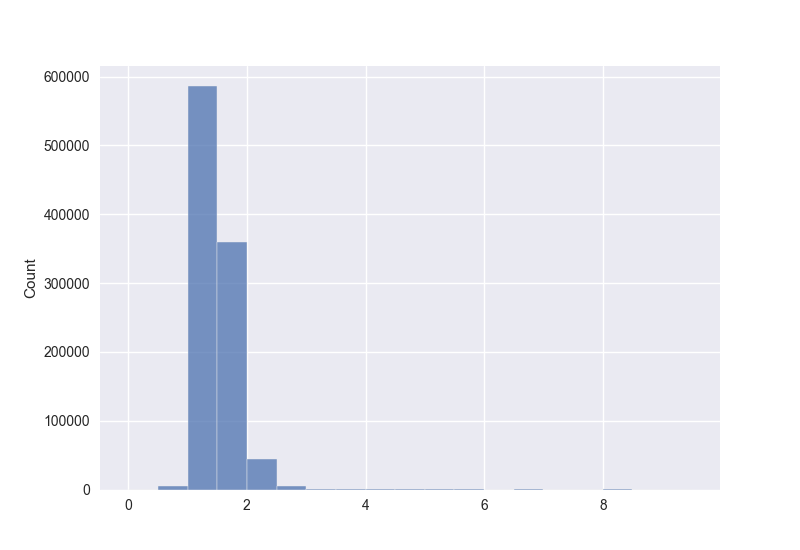

In [184]:
plt.figure()
sns.histplot(product_dataset.products.width / product_dataset.products.lenght, bins=np.arange(0, 10, 0.5));
plt.show()

<IPython.core.display.Javascript object>


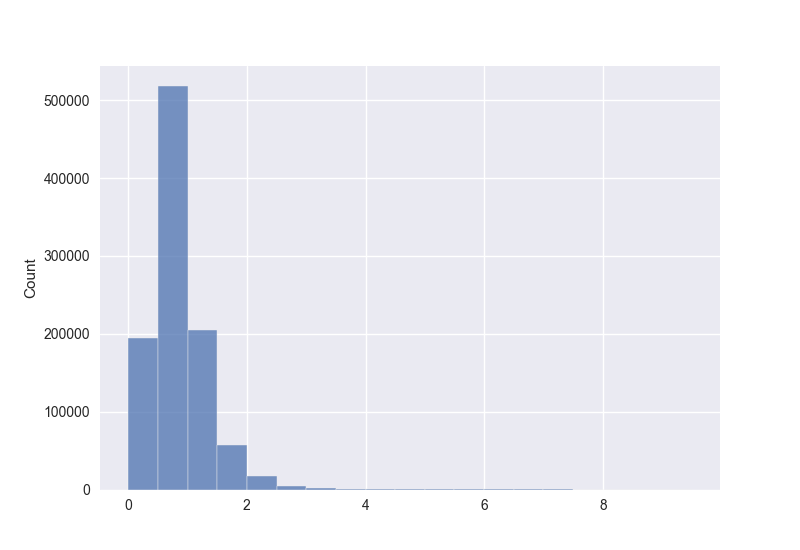

In [183]:
plt.figure()
sns.histplot(product_dataset.products.height / product_dataset.products.lenght, bins=np.arange(0, 10, 0.5));
plt.show()

<IPython.core.display.Javascript object>


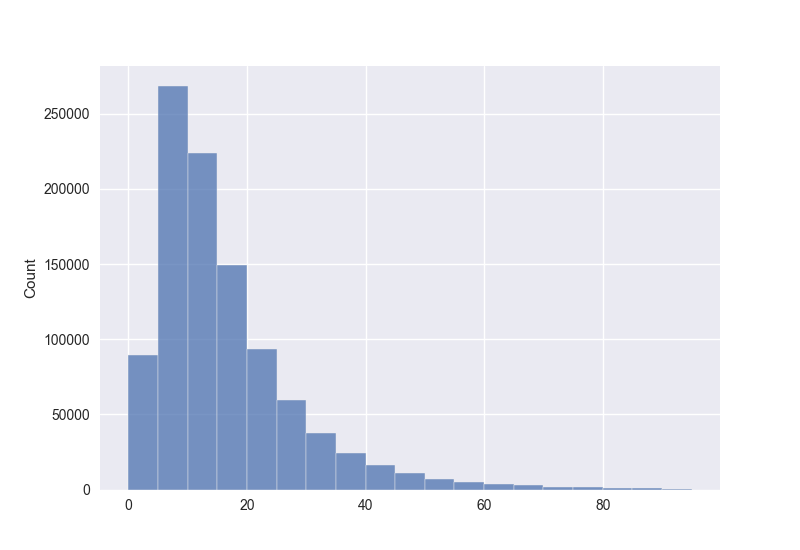

In [181]:
plt.figure()
sns.histplot(product_dataset.products.lenght * product_dataset.products.width * product_dataset.products.height / 1e+6, bins=np.arange(0, 100, 5));
plt.show()

<IPython.core.display.Javascript object>


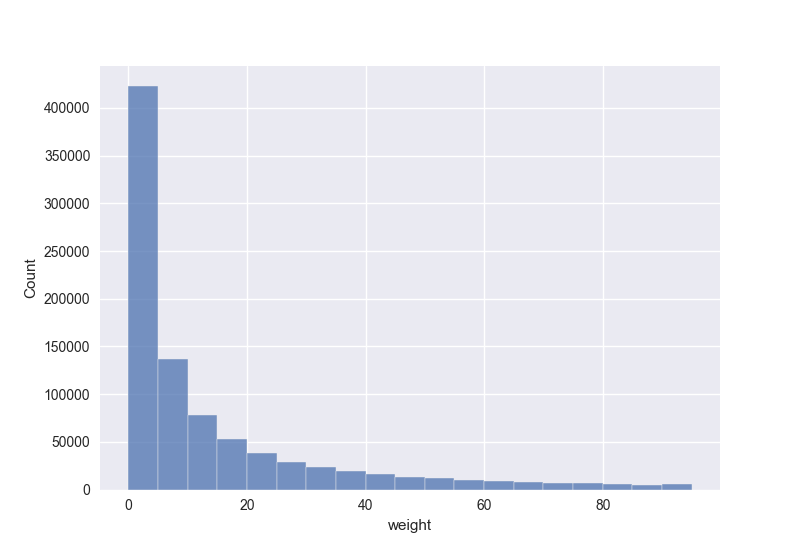

In [180]:
plt.figure()
sns.histplot(product_dataset.products.weight, bins=np.arange(0, 100, 5));
plt.show()